In [1]:
#MAIN LOOP - where we run the simulations to figure out statistical significance of changes

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
%load_ext autotime
from bootstrap import *

In [3]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin/"
ff = "Pchina_type.nc"
filename = ferretpath + ff
myf = nc.Dataset(filename, 'r')

time: 24.5 ms


In [4]:
P_total =  myf.variables['Pchina_total'][:]
P_band = myf.variables['Pchina_band'][:]
P_local = myf.variables['Pchina_local'][:]

time: 89.4 ms


In [10]:
def smooth(P,dayrange,latrange):
    Psmooth=np.zeros(P.shape)
    
    ll=int((dayrange-1)/2)
    yy=int((latrange-1)/2)
    
    days = P.shape[0]
    lats = P.shape[1]
    
    for d in range(days):
        for j in range(lats):
            
            Psample = P.take(range(d-ll,d+ll+1), mode='wrap', axis=0)
            Ps = Psample[:,max(0,j-yy):min(days,j+yy+1)]
            Psmooth[d,j] = np.mean(np.mean(Ps))
    
    return Psmooth

time: 8.11 ms


In [38]:
#years of interest - start and end date, with index starting at 1 out of habit.
p1_yr_b = [1,30]
p1_yr_e = [29,43]
p2_yr_b = [30,44]
p2_yr_e = [57,57]

P_total_diffs = []
P_band_diffs = []
P_local_diffs = []

#cycle through all time periods of interest and find changes in each type of rainfall b/w periods
for p1_b, p1_e, p2_b, p2_e, i in zip(p1_yr_b, p1_yr_e, p2_yr_b, p2_yr_e, np.arange(len(p1_yr_b))): 
    
    P_total_diffs.append(np.mean(P_total[:,:,p2_b-1:p2_e], axis=2) - \
                         np.mean(P_total[:,:,p1_b-1:p1_e], axis=2))
    P_band_diffs.append(np.mean(P_band[:,:,p2_b-1:p2_e], axis=2) \
                       - np.mean(P_band[:,:,p1_b-1:p1_e], axis=2))
    P_local_diffs.append(np.mean(P_local[:,:,p2_b-1:p2_e], axis=2) \
                        - np.mean(P_local[:,:,p1_b-1:p1_e], axis=2))

time: 21.7 ms


In [46]:
#smooth out the decadal precipitation means
#but, no latitudinal smoothing since rainfall already effectively smoothed in latitude
daysmth = 15
latsmth = 0

P_total_diffs_smth = []
P_band_diffs_smth = []
P_local_diffs_smth = []    
    
for i, item in enumerate(P_total_diffs):
    qq = [ x for x in item ]
    print(qq)
    time.sleep(5)
    #P_total_diff_smth.append([ smooth(x,daysmth,latsmth) for x in item ])

[array([-0.33705197, -2.70379268, -1.93510163, -1.28870682, -0.52252136,
       -0.82051369, -0.88999455, -0.92351991, -1.00294169, -0.82286323,
       -0.82126014, -0.78776336, -0.83608946, -0.87237809, -0.7986083 ,
       -0.72633078, -0.67993186, -0.68640118, -0.76171893, -0.82876541,
       -0.91671809, -0.96940386, -1.1012836 , -1.23500081, -1.30784948,
       -1.33918444, -1.35631516, -1.37742844, -1.35327602, -1.29744491,
       -1.2173696 , -1.11129405, -0.98155906, -0.90518771, -0.81273488,
       -0.74717541, -0.76499585, -0.68626842, -0.71294113, -0.69672385,
       -0.64893537, -0.49418887, -0.47860688, -0.37514155, -0.33083367,
       -0.29448307, -0.23699081, -0.14234421, -0.01178863,  0.10335643,
        0.20336001,  0.29084825,  0.30534657,  0.28066113,  0.2837848 ,
        0.29091914,  0.29773785,  0.28342875,  0.28362385,  0.27909117,
        0.24349966,  0.22575992,  0.20303743,  0.18435364,  0.16252808,
        0.15600452,  0.14679649,  0.15007207,  0.14113742,  0.1

In [ ]:
## SMOOTHING ##
P_total_diff_smth = [ smooth(x,daysmth,latsmth) for x,i in P_total_diff[i] ]
P_band_diff_smth = [ smooth(x,daysmth,latsmth) for x,i in P_band_diff[i] ]
P_local_diff_smth = [ smooth(x,daysmth,latsmth) for x,i in P_local_diff[i] ]

In [33]:
P_total_diff_smth[2].shape

IndexError: list index out of range

time: 4.25 ms


<IPython.core.display.Javascript object>


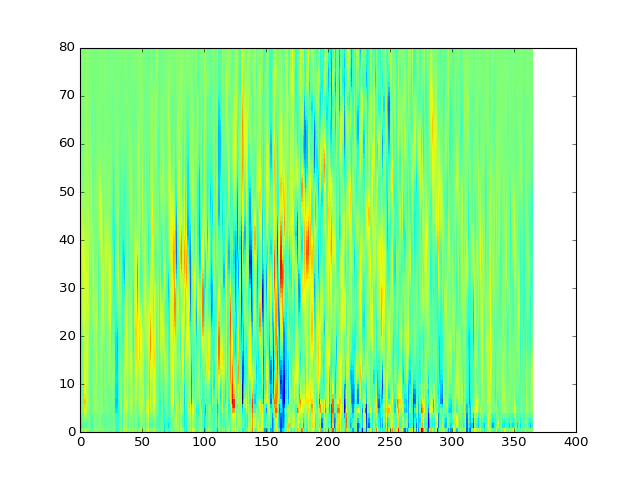

time: 586 ms


In [36]:
plt.pcolor(P_total_diffs[0].T)

In [ ]:
## NEW STRATEGY - performing the bootstrapping simply as a function of the data and years
yr0=1951
daysmth = 15 #smoothing in days used to show data on rainfall differences
niter=1000 #how many iterations each time?

In [ ]:
#third axis - choice of time periods, fourth axis - block length
P_total_diff_pval = np.empty((365,80,2,4)) 
P_band_diff_pval = np.empty((365,80,2,4)) 
P_local_diff_pval = np.empty((365,80,2,4)) 